In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
# import hdbscan
from sklearn.cluster import AgglomerativeClustering
import sklearn.compose
import sklearn.preprocessing

In [ ]:
# df = pd.read_csv('CSV files/customers.csv')
df = pd.read_csv('https://raw.githubusercontent.com/m-mahdavi/teaching/main/datasets/customers.csv')
df.head(21)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
5,100000006,0,0,35,1,144848,0,0
6,100000007,0,0,53,1,156495,1,1
7,100000008,0,0,35,1,193621,2,1
8,100000009,0,1,61,2,151591,0,0
9,100000010,0,1,28,1,174646,2,0


In [ ]:
df.dtypes

ID                 int64
Sex                int64
Marital status     int64
Age                int64
Education          int64
Income             int64
Occupation         int64
Settlement size    int64
dtype: object

In [ ]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [ ]:
df.isna().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [ ]:
df = df.drop(['ID'], axis = 1)
display(df.head(21))

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
5,0,0,35,1,144848,0,0
6,0,0,53,1,156495,1,1
7,0,0,35,1,193621,2,1
8,0,1,61,2,151591,0,0
9,0,1,28,1,174646,2,0


pandas.core.frame.DataFrame

In [ ]:
df['Settlement size'].value_counts()

0    989
1    544
2    467
Name: Settlement size, dtype: int64

In [ ]:
df['Income'].unique()

array([124670, 150773,  89210, ...,  86400,  97968,  68416])

In [ ]:
print(f'DF size: {df.shape}')

DF size: (2000, 7)


In [ ]:
# categorical_attributes = df.select_dtypes(include = ['object']).columns.tolist()
numerical_attributes = df.select_dtypes(include = ['int64']).columns.tolist()

ct =  sklearn.compose.ColumnTransformer([
    ('standard_scaling', sklearn.preprocessing.StandardScaler(), numerical_attributes)
])

# ct.fit_transform(df)
ct.fit(df)
df_ct = ct.transform(df)

print(f'df_ct size: {df_ct.shape}')
type(df_ct)

df_ct size: (2000, 7)


numpy.ndarray

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

## K-Means Clustering Algorithm

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

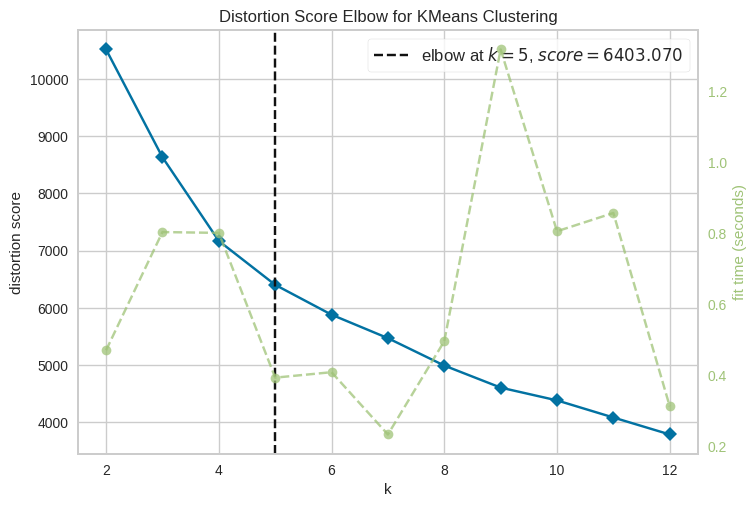

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Instantiate the clustering model and visualizer
modelKmeans = KMeans(n_clusters = 8, init = "k-means++", random_state = None)
visualizerK = KElbowVisualizer(modelKmeans, k=(2,13))

visualizerK.fit(df_ct)        # Fit the data to the visualizer
visualizerK.show()        # Finalize and render the figure

In [ ]:
silhouette_score(df_ct, modelKmeans.fit_predict(df_ct))
# silhouette_samples(df_ct, model.fit_predict(df_ct))

# visualizerS = SilhouetteVisualizer(model, colors='yellowbrick')

# visualizerS.fit(df_ct)        # Fit the data to the visualizer
# visualizerS.show()        # Finalize and render the figure

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.31347614735947255

In [ ]:
silhouette_samples(df_ct, modelKmeans.fit_predict(df_ct))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0.28027829, 0.26980427, 0.49082457, ..., 0.52327926, 0.54386704,
       0.60043968])

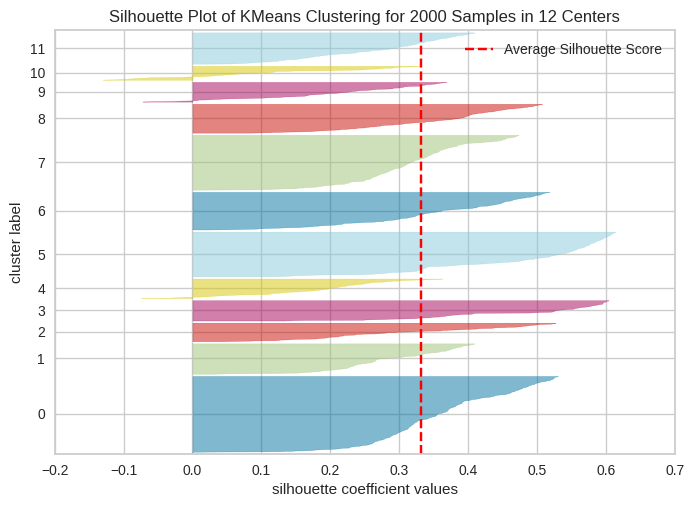

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2000 Samples in 12 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
visualizerS = SilhouetteVisualizer(modelKmeans, colors='yellowbrick')

visualizerS.fit(df_ct)        # Fit the data to the visualizer
visualizerS.show()        # Finalize and render the figure

## Agglomerative Clustering algorithm

In [ ]:
modelAggClust = AgglomerativeClustering().fit(df_ct)
modelAggClust.labels_

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
silhouette_score(df_ct, modelAggClust.fit_predict(df_ct))

0.23099458010188773

In [ ]:
silhouette_samples(df_ct, modelAggClust.fit_predict(df_ct))

array([0.25494781, 0.1586761 , 0.11263852, ..., 0.1801421 , 0.46636153,
       0.21225476])

In [ ]:
visualizerS1 = SilhouetteVisualizer(modelAggClust, colors='yellowbrick')

visualizerS1.fit(df_ct)        # Fit the data to the visualizer
visualizerS1.show()        # Finalize and render the figure

AttributeError: 'AgglomerativeClustering' object has no attribute 'predict'